# Ngonye Falls Flow Analysis


In [37]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

bookRenderer=""
#bookRenderer="notebook+plotly_mimetype"


# Load the Data

In [23]:
daily = pd.read_csv("prepared_daily.csv").set_index('Date')
#daily

In [24]:
monthly = pd.read_csv("prepared_monthly.csv").set_index('MonthId')
#monthly

In [25]:
calmonthly = pd.read_csv("prepared_calmonthly.csv").set_index('WaterMonth')
#calmonthly

In [36]:
yearly = pd.read_csv("prepared_yearly.csv").set_index('WaterYear')
#yearly

# Charts

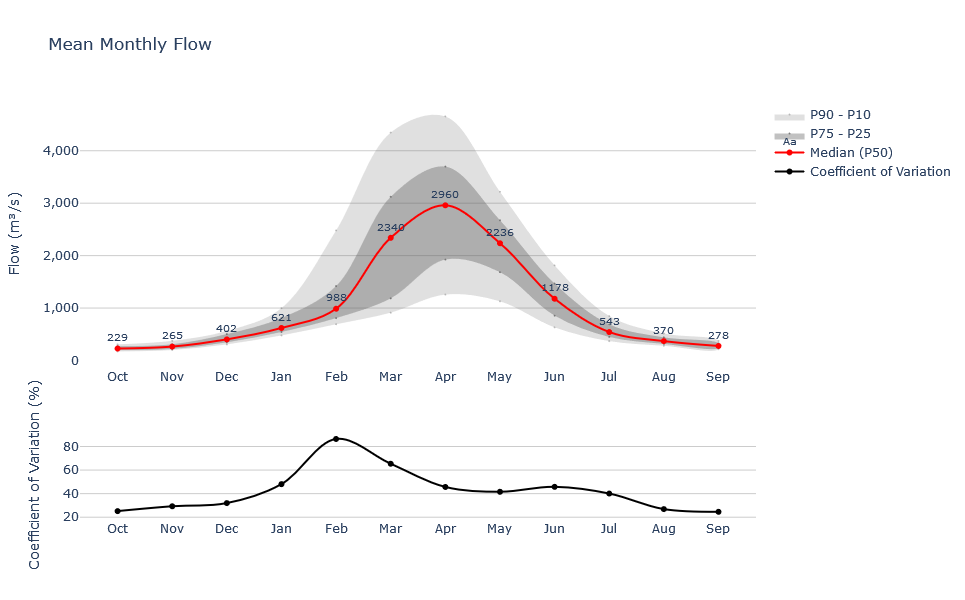

In [27]:
fig = make_subplots(rows=2, cols=1,row_heights=[0.75, 0.25])

fig.add_trace(
        go.Scatter(
            x=pd.concat([calmonthly['MonthName'],calmonthly['MonthName'][::-1]]), 
            y=pd.concat([calmonthly['Flow_P90'],calmonthly['Flow_P10'][::-1]]),
            name='P90 - P10',mode='markers',
            fill='toself',fillcolor='rgba(100,100,100,0.2)',
            line_shape='spline', line_width=0,  
            marker_size=2,marker_color='rgba(100,100,100,0.4)',
            hoverlabel=dict(bgcolor='rgba(200,200,200,0.2)'),hovertemplate='%{x}: %{y:0f} m\u00B3/s</br><extra></extra>'), row=1, col=1)
fig.add_trace(
        go.Scatter(
            x=pd.concat([calmonthly['MonthName'],calmonthly['MonthName'][::-1]]), 
            y=pd.concat([calmonthly['Flow_P75'],calmonthly['Flow_P25'][::-1]]),
            name='P75 - P25', mode='markers',
            fill='toself', fillcolor='rgba(100,100,100,0.4)',
            line_shape='spline', line_width=0, 
            marker_size=2,marker_color='rgba(100,100,100,0.8)',
            hoverlabel=dict(bgcolor='rgba(200,200,200,0.2)'),hovertemplate='%{x}: %{y:0f} m\u00B3/s</br><extra></extra>'), row=1, col=1)
fig.add_trace(
        go.Scatter(
            x=calmonthly['MonthName'], 
            y=calmonthly['Flow_P50'],
            name='Median (P50)',mode='lines+text+markers',
            text=calmonthly['Flow_P50'], texttemplate='%{text:0f}',textfont_size=10, textposition='top center',
            hoverlabel=dict(bgcolor='rgba(200,200,200,0.2)'),hovertemplate='%{x}: %{y:0f} m\u00B3/s</br><extra></extra>',
            line_shape='spline',line = dict(color='red', width=2) ), row=1, col=1)

fig.add_trace(
        go.Scatter(
            x=calmonthly['MonthName'], 
            y=calmonthly['Flow_coefvar'],
            name='Coefficient of Variation',mode='lines+markers',
            #text=calmonthly['Flow_coefvar'], texttemplate='%{text:0f}%',textfont_size=10, textposition='bottom center',
            hoverlabel=dict(bgcolor='rgba(200,200,200,0.2)'),hovertemplate='%{x}: %{y:0f}%</br><extra></extra>',
            line_shape='spline',line = dict(color='black', width=2) ), row=2, col=1)


fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
    ),
    yaxis=dict(
        showline=False, showgrid=True,
        separatethousands=True,
        gridcolor='rgb(204, 204, 204)',
    ),
    width=900, height=600, autosize=False,
    title_text='Mean Monthly Flow',
    plot_bgcolor='white'
)

fig.update_yaxes(title_text='Flow (m\u00B3/s)',row=1,col=1)
fig.update_yaxes(title_text='Coefficient of Variation (%)',gridcolor='rgb(204, 204, 204)',row=2,col=1)

fig.show(renderer=bookRenderer)

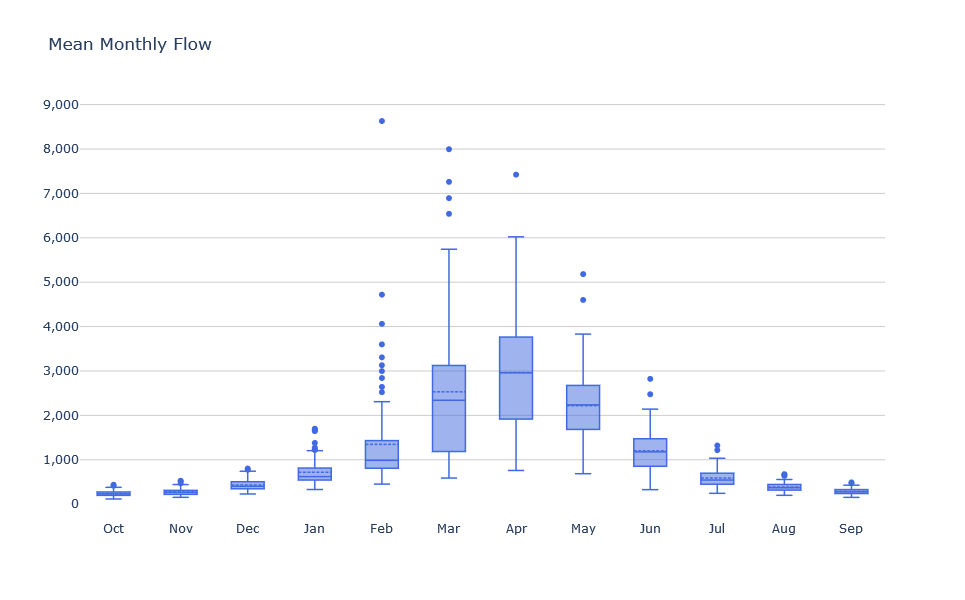

In [28]:

#fig = go.Figure(data=[go.Box(
#    y=3.5 * np.sin(np.pi * i/N) + i/N + (1.5 + 0.5 * np.cos(np.pi*i/N)) * np.random.rand(10),
#    marker_color=c[i]
#    ) for i in range(int(N))])

fig=go.Figure(data=[
    go.Box(
        y=mnth['Flow_mean'],
        boxmean=True,
        marker_color='royalblue',
        line_color='royalblue',
        line_width=1.5,
        name=calmonthly.loc[mnth_no,'MonthName']
    ) for mnth_no, mnth in monthly.groupby('WaterMonth')
])

# format the layout
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
    ),
    yaxis=dict(
        showline=False, showgrid=True,
        separatethousands=True,
        gridcolor='rgb(204, 204, 204)',
    ),
    width=900, height=600, autosize=False,
    title_text='Mean Monthly Flow',
    plot_bgcolor='white',
    showlegend=False
)

fig.show(renderer=bookRenderer)

# Annual Mean, Max and Min

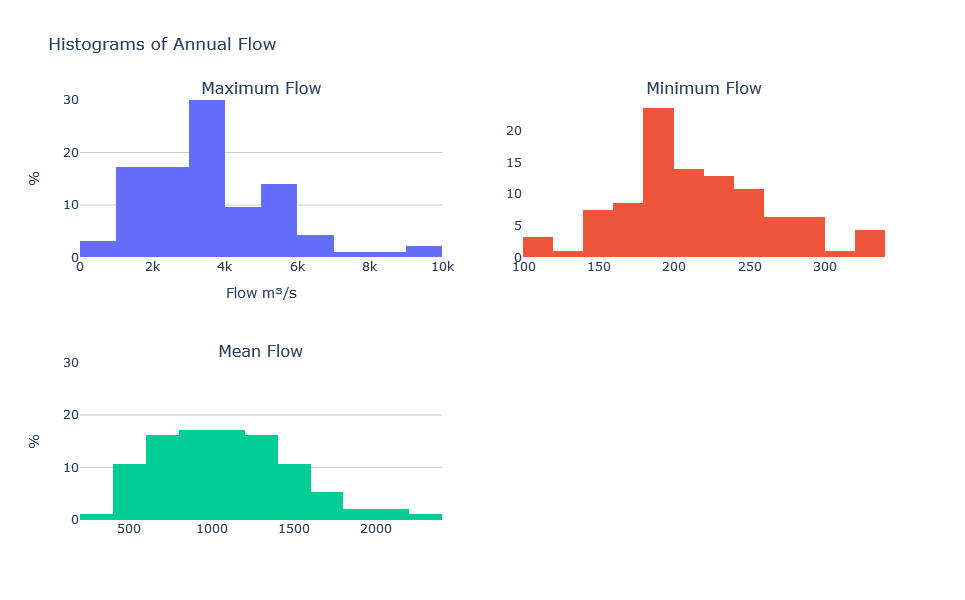

In [29]:

fig = make_subplots(rows=2, cols=2, subplot_titles=("Maximum Flow","Minimum Flow","Mean Flow"))
fig.add_trace(go.Histogram(x=yearly['Flow_max'],histnorm='percent'),row=1,col=1)
fig.add_trace(go.Histogram(x=yearly['Flow_min'],histnorm='percent'),row=1,col=2)
fig.add_trace(go.Histogram(x=yearly['Flow_mean'],histnorm='percent'),row=2,col=1)

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        title_text="Flow m\u00B3/s"
    ),
    width=1000, height=600, autosize=False,
    plot_bgcolor='white',
    showlegend=False,
    title_text="Histograms of Annual Flow"
)
fig.update_yaxes(showline=False, showgrid=True,gridcolor='rgb(204, 204, 204)',title_text='%',row=1,col=1,range=(0,30))
fig.update_yaxes(showline=False, showgrid=True,gridcolor='rgb(204, 204, 204)',title_text='%',row=2,col=1,range=(0,30))
fig.update_yaxes(showline=False, showgrid=True,gridcolor='rgb(204, 204, 204)',title_text='%',row=2,col=1,range=(0,30))
fig.show(renderer=bookRenderer)

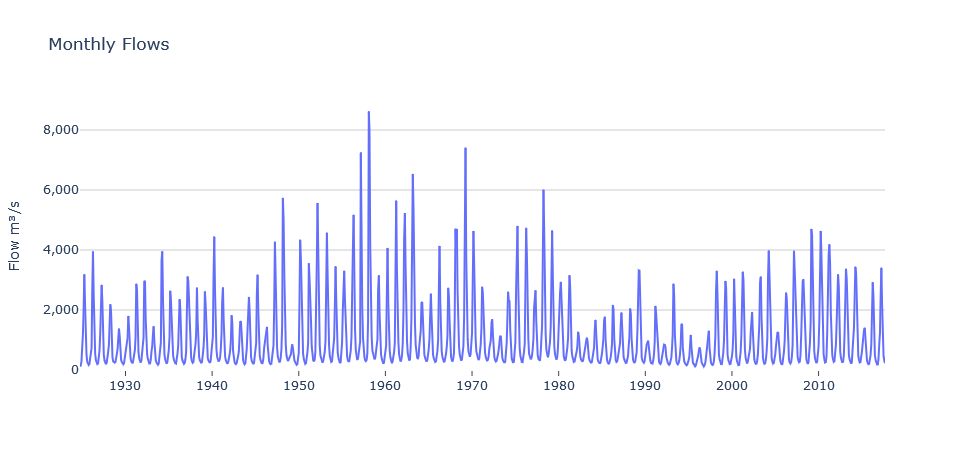

In [30]:

fig = go.Figure(
    data=[
        go.Scatter(x=monthly['DateStart'], y=monthly['Flow_mean'])
         ]
)
fig.update_layout(
    title_text='Monthly Flows',
    plot_bgcolor='white',
    xaxis=dict(
        showline=False,
        showgrid=False,
        showticklabels=True,
        ticks='outside',
    ),
    yaxis=dict(
        title_text='Flow m\u00B3/s',
        range=(0,9000),
        separatethousands=True,
        gridcolor='rgb(204, 204, 204)',
    )
)
fig.show(renderer=bookRenderer)


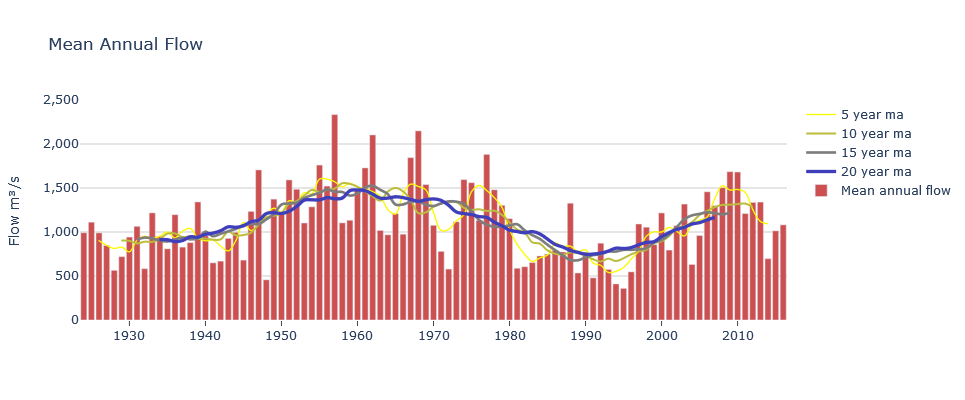

In [31]:
windows=[w for w in range(5,25,5)]
cols=['rgba('+ str((1-a)*250) +','+ str((1-a)*250) +','+ str((a)*250) +',1)' for a in np.linspace(0, 1, 5)]

fig = go.Figure(
    data=[
        go.Scatter(
            x=yearly.index, y=yearly['Flow_mean'].rolling(windows[i],center=True).mean(), 
            name=str(windows[i]) + ' year ma',
            line_shape='spline',line = dict(color=cols[i], width=(i+2)/1.5)
        ) for i in range(0,4) ])

fig.add_trace(go.Bar(x=yearly.index, y=yearly['Flow_mean'],name='Mean annual flow',marker_color='rgb(204, 80, 80)'))#,line_shape='spline',line = dict(color='rgba(50,50,50,0.2)', width=2)))

fig.update_layout(
    title_text='Mean Annual Flow',
    plot_bgcolor='white',
    xaxis=dict(showline=False,showgrid=False,showticklabels=True,ticks='outside'),
    yaxis=dict(title_text='Flow m\u00B3/s',range=(0,2500),separatethousands=True,gridcolor='rgb(204, 204, 204)'),
    width=1200, height=400, autosize=False
)
fig.show(renderer=bookRenderer)

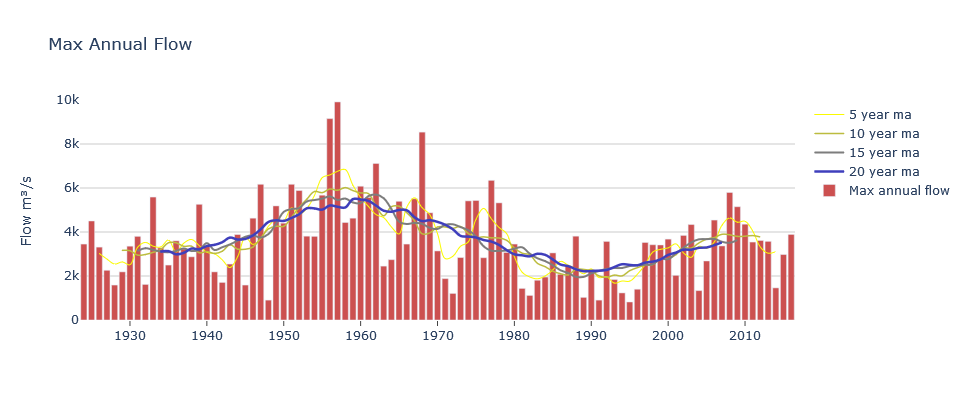

In [32]:
windows=[w for w in range(5,25,5)]
cols=['rgba('+ str((1-a)*250) +','+ str((1-a)*250) +','+ str((a)*250) +',1)' for a in np.linspace(0, 1, 5)]

fig = go.Figure(
    data=[
        go.Scatter(
            x=yearly.index, y=yearly['Flow_max'].rolling(windows[i],center=True).mean(), 
            name=str(windows[i]) + ' year ma',
            line_shape='spline',line = dict(color=cols[i], width=(i+2)/2)
        ) for i in range(0,4) ])

fig.add_trace(go.Bar(x=yearly.index, y=yearly['Flow_max'],name='Max annual flow',marker_color='rgb(204, 80, 80)'))#,line_shape='spline',line = dict(color='rgba(50,50,50,0.2)', width=2)))

fig.update_layout(
    title_text='Max Annual Flow',
    plot_bgcolor='white',
    xaxis=dict(showline=False,showgrid=False,showticklabels=True,ticks='outside'),
    yaxis=dict(title_text='Flow m\u00B3/s',range=(0,10000),separatethousands=True,gridcolor='rgb(204, 204, 204)'),
    width=1200, height=400, autosize=False,
)
fig.show(renderer=bookRenderer)

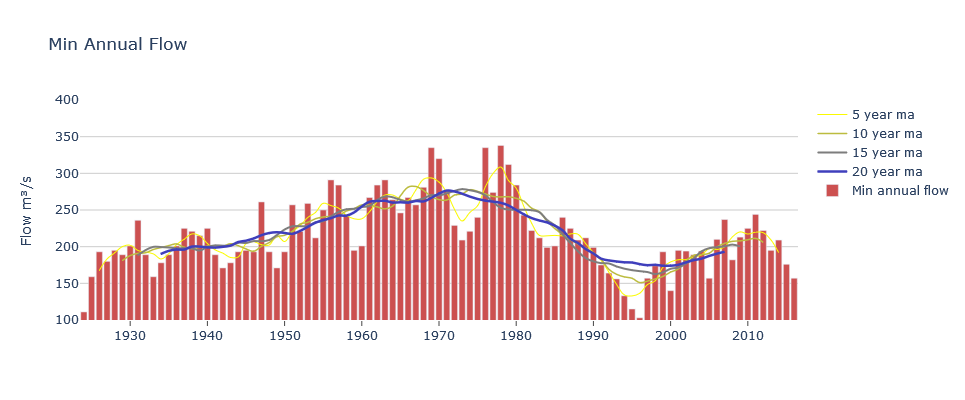

In [33]:
windows=[w for w in range(5,25,5)]
cols=['rgba('+ str((1-a)*250) +','+ str((1-a)*250) +','+ str((a)*250) +',1)' for a in np.linspace(0, 1, 5)]

fig = go.Figure(
    data=[
        go.Scatter(
            x=yearly.index, y=yearly['Flow_min'].rolling(windows[i],center=True).mean(), 
            name=str(windows[i]) + ' year ma',
            line_shape='spline',line = dict(color=cols[i], width=(i+2)/2)
        ) for i in range(0,4) ])

fig.add_trace(go.Bar(x=yearly.index, y=yearly['Flow_min'],name='Min annual flow',marker_color='rgb(204, 80, 80)'))#,line_shape='spline',line = dict(color='rgba(50,50,50,0.2)', width=2)))

fig.update_layout(
    title_text='Min Annual Flow',
    plot_bgcolor='white',
    xaxis=dict(showline=False,showgrid=False,showticklabels=True,ticks='outside'),
    yaxis=dict(title_text='Flow m\u00B3/s',range=(100,400),separatethousands=True,gridcolor='rgb(204, 204, 204)'),
    width=1200, height=400, autosize=False,
)
fig.show(renderer=bookRenderer)

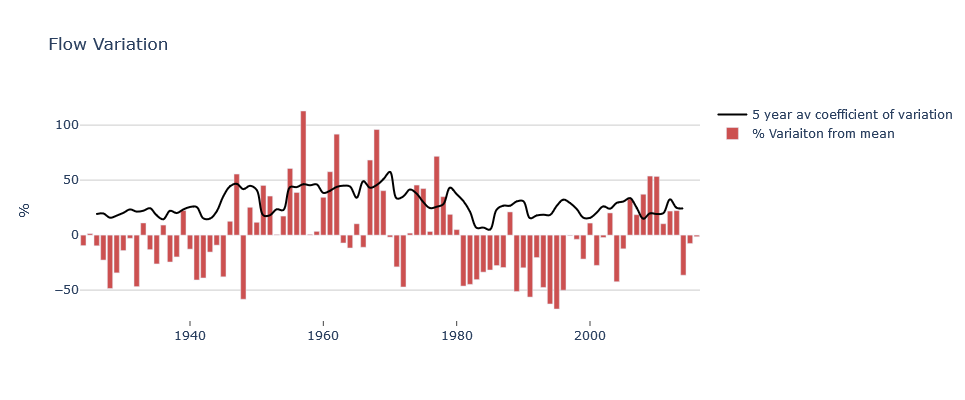

In [34]:

fig = go.Figure(
    data=[
        go.Scatter(
            x=yearly.index, y=yearly['Flow_mean_5yr_mvCoefVar'], 
            name='5 year av coefficient of variation',
            line_shape='spline',line = dict(color='black', width=2) )])

fig.add_trace(go.Bar(x=yearly.index, y=yearly['Flow_mean_pct_var'],name='% Variaiton from mean',marker_color='rgb(204, 80, 80)'))
        
fig.update_layout(
    title_text='Flow Variation',
    plot_bgcolor='white',
    xaxis=dict(showline=False,showgrid=False,showticklabels=True,ticks='outside'),
    yaxis=dict(title_text='%',separatethousands=True,gridcolor='rgb(204, 204, 204)'),
    width=1200, height=400, autosize=False,
)
fig.show(renderer=bookRenderer)

In [38]:

@interact
def show_average(Window=widgets.IntSlider(min=2, max=24, step=2, value=2)):
    fig = go.Figure(data=[
            go.Scatter(x=yearly.index, y=yearly['Flow_mean'].rolling(Window,center=True).mean(), 
                name=str(Window) + ' year ma',line_shape='spline',line = dict(color='black', width=2))])
    
    fig.add_trace(go.Bar(x=yearly.index, y=yearly['Flow_mean'],name='Mean annual flow',marker_color='rgb(204, 80, 80)'))

    fig.update_layout(
        title_text='Mean Annual Flow',
        plot_bgcolor='white',
        xaxis=dict(showline=False,showgrid=False,showticklabels=True,ticks='outside'),
        yaxis=dict(title_text='Flow m\u00B3/s',range=(0,2500),separatethousands=True,gridcolor='rgb(204, 204, 204)'),
        width=1200, height=400, autosize=False,
    )
    fig.show(renderer=bookRenderer)
    

interactive(children=(IntSlider(value=2, description='Window', max=24, min=2, step=2), Output()), _dom_classes…